# 背景介绍

在学习机器学习相关项目时，Titanic生存率预测项目也通常是入门练习的经典案例。Kaggle平台为我们
提供了一个竞赛案例“Titanic: Machine Learning from Disaster”，在该案例中，我们将探究什么样的人
在此次海难中幸存的几率更高，并通过构建预测模型来预测乘客生存率。

# 加载数据

In [1]:
#导入相关包
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns

#设置sns样式
sns.set(style='white',context='notebook',palette='muted')
import matplotlib.pyplot as plt

#导入数据
train=pd.read_csv('./train.csv')
test=pd.read_csv('./test.csv')
display(train.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 数据探索

## 数据查看

In [2]:
#分别查看实验数据集和预测数据集数据
print('训练数据大小:',train.shape)
print('预测数据大小:',test.shape)

训练数据大小: (891, 12)
预测数据大小: (418, 11)


In [3]:
display(train.head(),test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 数据合并

In [4]:
#将训练数据和预测数据合并，这样便于一起处理
full=train.append(test,ignore_index=True)
full.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [5]:
full.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 查看info()详情

In [7]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


## 特征与标签之间的关系

### 港口和生还率关系

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

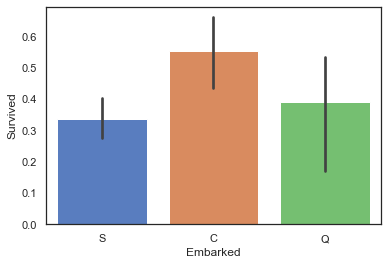

In [12]:
# 港口和生死之间的关系
sns.barplot(data=train,x='Embarked',y='Survived',ci=100)

In [14]:
#计算不同类型Embarked的乘客，其生存率为多少
s = full.groupby('Embarked')['Survived'].value_counts().to_frame()
display(s)
s2 = s/s.sum(level=0) # 生存率
display(s2)
pd.merge(s,s2,left_index=True,right_index=True,suffixes=['_num','_rate'])

Survived
Embarked Survived          
C        1.0             93
         0.0             75
Q        0.0             47
         1.0             30
S        0.0            427
         1.0            217

Survived
Embarked Survived          
C        1.0       0.553571
         0.0       0.446429
Q        0.0       0.610390
         1.0       0.389610
S        0.0       0.663043
         1.0       0.336957

Survived_num  Survived_rate
Embarked Survived                             
C        1.0                 93       0.553571
         0.0                 75       0.446429
Q        0.0                 47       0.610390
         1.0                 30       0.389610
S        0.0                427       0.663043
         1.0                217       0.336957

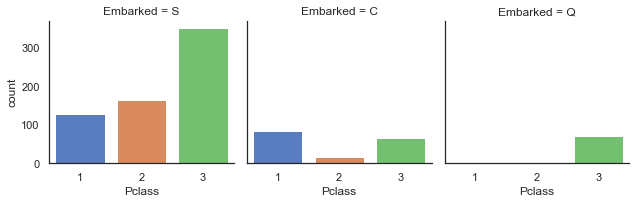

In [15]:
sns.catplot('Pclass',col='Embarked',data=train,kind='count',size=3)

### 家长和孩子数量与生死关系

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

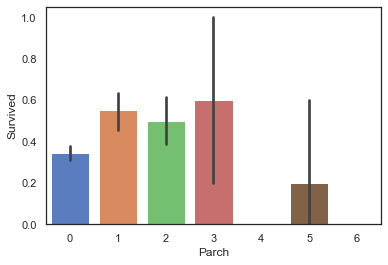

In [16]:
sns.barplot(data=train,x='Parch',y='Survived')

当乘客同行的父母及子女数量适中时，生存率较高

### 兄弟姐妹与Survived关系

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

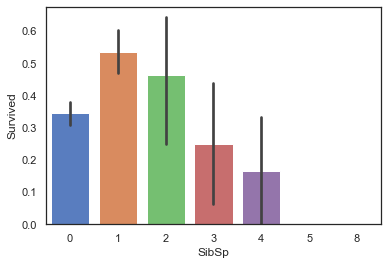

In [17]:
sns.barplot(data=train,x='SibSp',y='Survived')

当乘客同行的同辈数量适中时生存率较高

### 等级与Survived关系

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

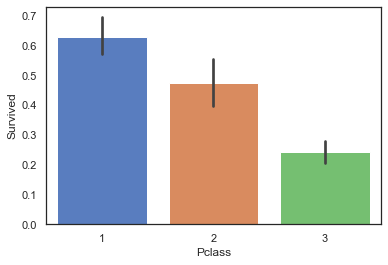

In [18]:
sns.barplot(data=train,x='Pclass',y='Survived')

乘客客舱等级越高，生存率越高

### 性别与Survived关系

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

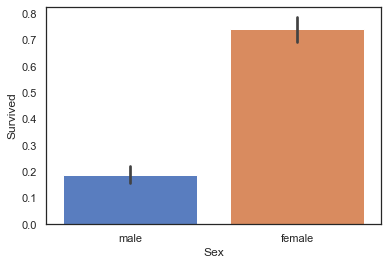

In [19]:
sns.barplot(data=train,x='Sex',y='Survived')

女性的生存率远高于男性

### 年龄与Survived关系

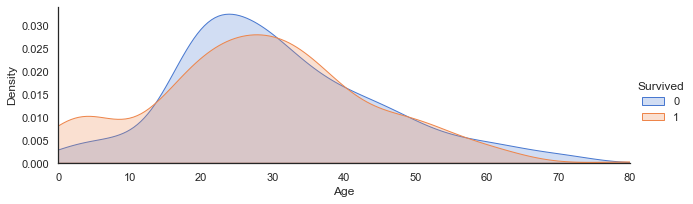

In [20]:
#创建坐标轴 
ageFacet=sns.FacetGrid(train,hue='Survived',aspect=3) 
#作图，选择图形类型 
ageFacet.map(sns.kdeplot,'Age',shade=True) 
#其他信息：坐标轴范围、标签等 
ageFacet.set(xlim=(0,train['Age'].max())) 
ageFacet.add_legend()

当乘客年龄段在0-10岁期间时生存率会较高

### 消费与Survived关系

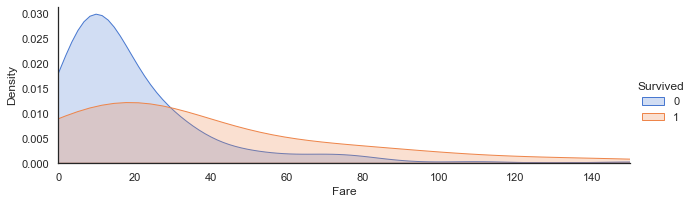

In [21]:
#创建坐标轴 
ageFacet=sns.FacetGrid(train,hue='Survived',aspect=3) 
ageFacet.map(sns.kdeplot,'Fare',shade=True) 
ageFacet.set(xlim=(0,150)) 
ageFacet.add_legend()

当消费低时乘客生存率较低，票价越高生存率一般越高！

### 票价分布

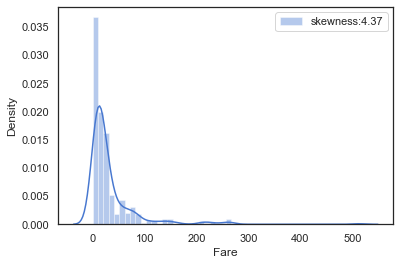

In [22]:
#查看fare分布
farePlot=sns.distplot(full['Fare'][full['Fare'].notnull()],
                      label='skewness:%.2f'%(full['Fare'].skew()))
farePlot.legend(loc='best')

对票价进行log转换

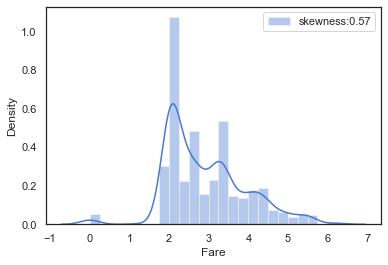

In [23]:
#对数化处理fare值
full['Fare']=full['Fare'].map(lambda x: np.log(x) if x > 0 else x)

#处理之后票价Fare分布
farePlot=sns.distplot(full['Fare'][full['Fare'].notnull()],
                      label='skewness:%.2f'%(full['Fare'].skew()))
farePlot.legend(loc='best')
# plt.savefig('./10-Fare票价分布.png',dpi = 200)

# 数据预处理

## 数据清洗

In [24]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


### Cabin（船舱）缺失值填充

In [25]:
#对Cabin缺失值进行处理，利用U（Unknown）填充缺失值
full['Cabin']=full['Cabin'].fillna('U')

full['Cabin'].head()

0       U
1     C85
2       U
3    C123
4       U
Name: Cabin, dtype: object

### Embarked（港口）缺失值填充

In [26]:
#对Embarked缺失值进行处理，查看缺失值情况 
display(full[full['Embarked'].isnull()]) 
display(full['Embarked'].value_counts()) 
# 查看Embarked数据分布情况，可知在英国南安普顿登船可能性最大，因此以此填充缺失值。 
full['Embarked']=full['Embarked'].fillna('S')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,4.382027,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,4.382027,B28,NaN


S    914
C    270
Q    123
Name: Embarked, dtype: int64

### Fare缺失值填充（乘客费用）

In [27]:
#查看缺失数据情况，该乘客乘坐3等舱，登船港口为法国，舱位未知
display(full[full['Fare'].isnull()])

# 利用3等舱，登船港口为英国，舱位未知旅客的平均票价来填充缺失值。
price = full[(full['Pclass']==3)&(full['Embarked']=='S')&(full['Cabin']=='U')]['Fare'].mean()

full['Fare']=full['Fare'].fillna(price)
full.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,U,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


## 特征工程

在理解原数据特征的基础上，特征工程通过对原有数据进行整合处理，得到新特征以反映数据更多信
息。

### Name中的头衔信息-Title

In [30]:
#构造新特征Title
full['Title']=full['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())
#查看title数据分布
full['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [31]:
#将title信息进行整合
TitleDict={}
TitleDict['Mr']='Mr'
TitleDict['Mlle']='Miss'
TitleDict['Miss']='Miss'
TitleDict['Master']='Master'
TitleDict['Jonkheer']='Master'
TitleDict['Mme']='Mrs'
TitleDict['Ms']='Mrs'
TitleDict['Mrs']='Mrs'
TitleDict['Don']='Royalty'
TitleDict['Sir']='Royalty'
TitleDict['the Countess']='Royalty'
TitleDict['Dona']='Royalty'
TitleDict['Lady']='Royalty'
TitleDict['Capt']='Officer'
TitleDict['Col']='Officer'
TitleDict['Major']='Officer'
TitleDict['Dr']='Officer'
TitleDict['Rev']='Officer'

full['Title']=full['Title'].map(TitleDict)
full['Title'].value_counts()

Mr         757
Miss       262
Mrs        200
Master      62
Officer     23
Royalty      5
Name: Title, dtype: int64

<AxesSubplot:xlabel='Title', ylabel='Survived'>

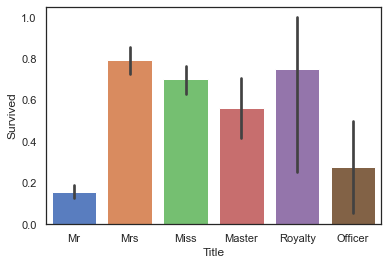

In [32]:
#可视化分析Title与Survived之间关系
sns.barplot(data=full,x='Title',y='Survived')

头衔为'Mr'及'Officer'的乘客，生存率明显较低。

### FamilyNum及FamilySize信息

<AxesSubplot:xlabel='familyNum', ylabel='Survived'>

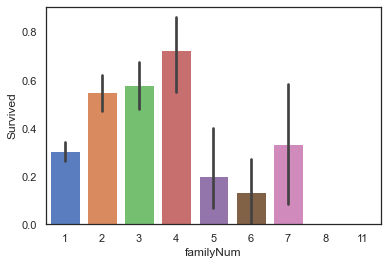

In [33]:
full['familyNum']=full['Parch']+full['SibSp'] + 1 
#查看familyNum与Survived 
sns.barplot(data=full,x='familyNum',y='Survived')

In [34]:
#我们按照家庭成员人数多少，将家庭规模分为小(0)、中(1)、大(2)三类：
def familysize(familyNum):
    if familyNum== 1 :
        return 0
    elif (familyNum>=2)&(familyNum<=4):
        return 1
    else:
        return 2

full['familySize']=full['familyNum'].map(familysize)
full['familySize'].value_counts()

0    790
1    437
2     82
Name: familySize, dtype: int64

<AxesSubplot:xlabel='familySize', ylabel='Survived'>

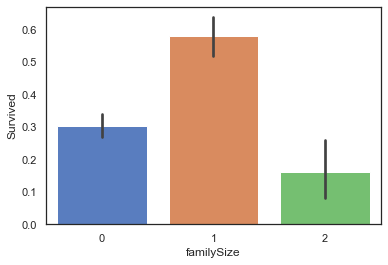

In [35]:
#查看familySize与Survived 
sns.barplot(data=full,x='familySize',y='Survived')

当家庭规模适中时，乘客的生存率更高

### Cabin客舱类型信息-Deck

In [36]:
full['Cabin'].unique()

array(['U', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [37]:
full['Cabin'][0]

'U'

In [38]:
full['Cabin'][2]

'U'

<AxesSubplot:xlabel='Deck', ylabel='Survived'>

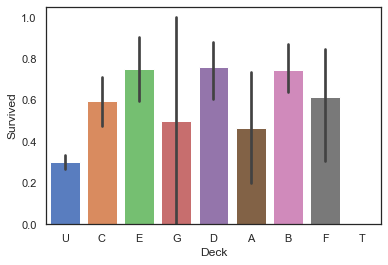

In [39]:
#提取Cabin字段首字母 
full['Deck']=full['Cabin'].map(lambda x:x[0]) 
#查看不同Deck类型乘客的生存率 
sns.barplot(data=full,x='Deck',y='Survived') 
# plt.savefig('./14-Deck与Survived关系.png',dpi = 200)

当乘客的客舱类型为B/D/E时，生存率较高；当客舱类型为U/T时，生存率较低。

### 共票号乘客数量TickCom及TickGroup

In [41]:
#提取各票号的乘客数量 
TickCountDict=full['Ticket'].value_counts() 
TickCountDict.head(10)

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
347077           7
347082           7
3101295          7
19950            6
113781           6
Name: Ticket, dtype: int64

In [43]:
full['TickCom'].head()

0    1
1    2
2    1
3    2
4    1
Name: TickCom, dtype: int64

<AxesSubplot:xlabel='TickCom', ylabel='Survived'>

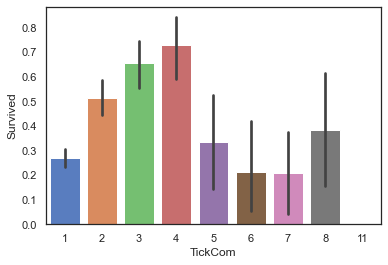

In [42]:
#将同票号乘客数量数据并入数据集中 
full['TickCom']=full['Ticket'].map(TickCountDict) 
full['TickCom'].head() 
#查看TickCom与Survived之间关系 
sns.barplot(data=full,x='TickCom',y='Survived')

In [44]:
full

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,familyNum,familySize,Deck,TickCom
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,U,S,Mr,2,1,U,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,Mrs,2,1,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,U,S,Miss,1,0,U,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,Mrs,2,1,C,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,U,S,Mr,1,0,U,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,2.085672,U,S,Mr,1,0,U,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,4.690430,C105,C,Royalty,1,0,C,3
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,1.981001,U,S,Mr,1,0,U,1
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,2.085672,U,S,Mr,1,0,U,1


<AxesSubplot:xlabel='TickGroup', ylabel='Survived'>

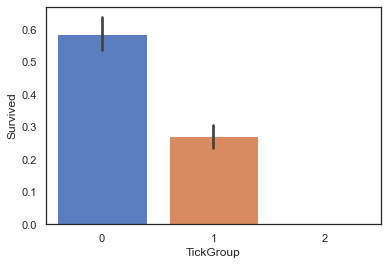

In [45]:
#按照TickCom大小，将TickGroup分为三类。
def TickCountGroup(num):
    if (num>=2)&(num<=4):
        return 0
    elif (num==1)|((num>=5)&(num<=8)):
        return 1
    else :
        return 2
#得到各位乘客TickGroup的类别
full['TickGroup']=full['TickCom'].map(TickCountGroup)
#查看TickGroup与Survived之间关系
sns.barplot(data=full,x='TickGroup',y='Survived')

当TickCom大小适中时，乘客生存率较高

### Age缺失值填充-构建随机森林模型预测缺失的数据

查看Age与Parch、Pclass、Sex、SibSp、Title、familyNum、familySize、Deck、TickCom、
TickGroup等变量的相关系数大小，筛选出相关性较高的变量构建预测模型

In [46]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
 13  familyNum    1309 non-null   int64  
 14  familySize   1309 non-null   int64  
 15  Deck         1309 non-null   object 
 16  TickCom      1309 non-null   int64  
 17  TickGroup    1309 non-null   int64  
dtypes: float64(3), int64(8), object(7)
memory usage:

In [47]:
full[full['Age'].notnull()].corr()
# 筛选：Pclass、SibSp、Parch、Fare、familyNum、familySize、TickCom

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,familyNum,familySize,TickCom,TickGroup
PassengerId,1.000000,0.029340,-0.064097,0.028814,-0.050700,-0.021096,0.038722,-0.044024,-0.048093,-0.013838,-0.005325
Survived,0.029340,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.342920,0.042787,0.106359,0.093239,-0.322862
Pclass,-0.064097,-0.359653,1.000000,-0.408106,0.047221,0.017224,-0.741394,0.039602,-0.074864,-0.114293,0.311226
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.194038,-0.240229,-0.174901,-0.185284,-0.005224
SibSp,-0.050700,-0.017358,0.047221,-0.243699,1.000000,0.374456,0.294004,0.844260,0.779310,0.621362,-0.131130
Parch,-0.021096,0.093317,0.017224,-0.150917,0.374456,1.000000,0.318137,0.813080,0.705738,0.641500,-0.162860
Fare,0.038722,0.342920,-0.741394,0.194038,0.294004,0.318137,1.000000,0.368463,0.451368,0.603769,-0.439788
familyNum,-0.044024,0.042787,0.039602,-0.240229,0.844260,0.813080,0.368463,1.000000,0.897180,0.760887,-0.176458
familySize,-0.048093,0.106359,-0.074864,-0.174901,0.779310,0.705738,0.451368,0.897180,1.000000,0.661291,-0.401090
TickCom,-0.013838,0.093239,-0.114293,-0.185284,0.621362,0.641500,0.603769,0.760887,0.661291,1.000000,-0.203938


#### 筛选数据

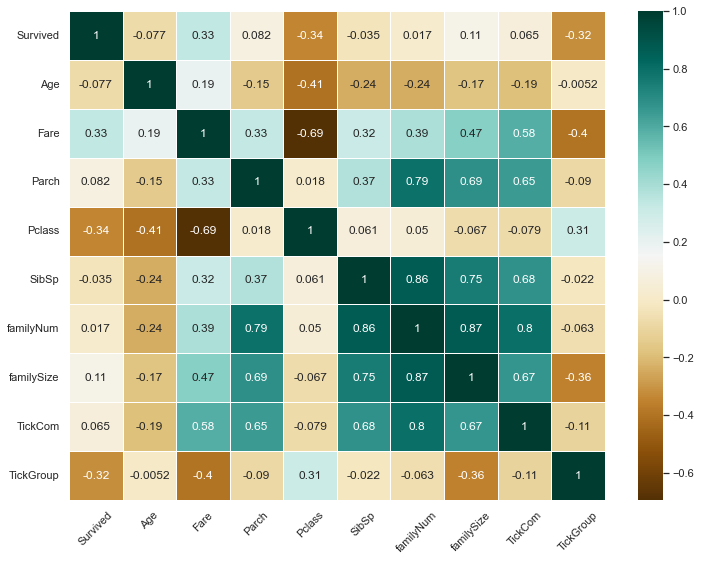

In [51]:
#热力图，查看age与其他特征间相关性大小
plt.figure(figsize=(12,9))
sns.heatmap(full[['Survived','Age','Embarked','Fare','Parch','Pclass',
                    'Sex','SibSp','Title','familyNum','familySize','Deck',
                     'TickCom','TickGroup']].corr(),cmap='BrBG',annot=True,
           linewidths=.5)
_ = plt.xticks(rotation=45)

In [52]:
#筛选数据集 
agePre=full[['Age','Parch','Pclass','SibSp','familyNum','TickCom','Title']] 
# 进行one-hot编码 
agePre=pd.get_dummies(agePre) 
ageCorrDf=agePre.corr() 
ageCorrDf['Age'].sort_values()

Pclass          -0.408106
Title_Master    -0.385380
Title_Miss      -0.282977
SibSp           -0.243699
familyNum       -0.240229
TickCom         -0.185284
Parch           -0.150917
Title_Royalty    0.057337
Title_Officer    0.166771
Title_Mr         0.183965
Title_Mrs        0.215091
Age              1.000000
Name: Age, dtype: float64

#### 拆分数据并建立模型（利用随机森林构建模型）

In [53]:
#拆分实验集和预测集
ageKnown=agePre[agePre['Age'].notnull()] 
ageUnKnown=agePre[agePre['Age'].isnull()] 
#生成实验数据的特征和标签 
ageKnown_X=ageKnown.drop(['Age'],axis=1) 
ageKnown_y=ageKnown['Age'] 
#生成预测数据的特征 
ageUnKnown_X=ageUnKnown.drop(['Age'],axis=1)

In [55]:
#利用随机森林构建模型
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=None,n_estimators=500,n_jobs=-1)
rfr.fit(ageKnown_X,ageKnown_y)

RandomForestRegressor(n_estimators=500, n_jobs=-1)

#### 利用模型进行预测并填入原数据集中

In [56]:
#模型得分
score = rfr.score(ageKnown_X,ageKnown_y)
print('模型预测年龄得分是：',score)
#预测年龄
ageUnKnown_predict = rfr.predict(ageUnKnown_X)
#填充预测数据
full.loc[full['Age'].isnull(),['Age']] = ageUnKnown_predict
full.info()  #此时已无缺失值

模型预测年龄得分是： 0.586348633594173
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
 13  familyNum    1309 non-null   int64  
 14  familySize   1309 non-null   int64  
 15  Deck         1309 non-null   object 
 16  TickCom      1309 non-null   int64  
 17  TickGroup    1309 non-null   int64  
dtypes: float64(3), int6

### 同组识别

虽然通过分析数据已有特征与标签的关系可以构建有效的预测模型，但是部分具有明显共同特征的用户
可能与整体模型逻辑并不一致。如果将这部分具有同组效应的用户识别出来并对其数据加以修正，就可
以有效提高模型的准确率。在Titanic案例中，我们主要探究相同姓氏的乘客是否存在明显的同组效应。
提取两部分数据，分别查看其“姓氏”是否存在同组效应（因为性别和年龄与乘客生存率关系最为密切，
因此用这两个特征作为分类条件）：
12岁以上男性：找出男性中同姓氏均获救的部分；
女性以及年龄在12岁以下儿童：找出女性及儿童中同姓氏均遇难的部分。

In [57]:
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,familyNum,familySize,Deck,TickCom,TickGroup
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,U,S,Mr,2,1,U,1,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,Mrs,2,1,C,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,U,S,Miss,1,0,U,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,Mrs,2,1,C,2,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,U,S,Mr,1,0,U,1,1


In [58]:
#提取乘客的姓氏及相应的乘客数
full['Surname']=full['Name'].map(lambda x:x.split(',')[0].strip())
SurNameDict=full['Surname'].value_counts()

# display(SurNameDict)

full['SurnameNum']=full['Surname'].map(SurNameDict)

# 12岁以上男性：找出男性中同姓氏均获救的部分
MaleDf=full[(full['Sex']=='male')&(full['Age']>12)&(full['familyNum']>=2)]

#分析男性同组效应
MSurNamDf=MaleDf['Survived'].groupby(MaleDf['Surname']).mean()
MSurNamDf.head()
MSurNamDf.value_counts()

0.0    89
1.0    19
0.5     3
Name: Survived, dtype: int64

In [59]:
#提取乘客的姓氏及相应的乘客数
full['Surname']=full['Name'].map(lambda x:x.split(',')[0].strip())
SurNameDict=full['Surname'].value_counts()
full['SurnameNum']=full['Surname'].map(SurNameDict)

#将数据分为两组
FemChildDf=full[((full['Sex']=='female')|(full['Age']<=12))&(full['familyNum']>=2)]

FCSurNamDf=FemChildDf['Survived'].groupby(FemChildDf['Surname']).mean()
FCSurNamDf.head()
FCSurNamDf.value_counts()

1.000000    115
0.000000     27
0.750000      2
0.333333      1
0.142857      1
Name: Survived, dtype: int64

In [60]:
MSurNamDf

Surname
Abbott            0.0
Abelson           0.0
Allison           NaN
Andersson         0.0
Angle             NaN
                 ... 
Williams          0.0
Yasbeck           0.0
de Messemaeker    NaN
del Carlo         0.0
van Billiard      0.0
Name: Survived, Length: 153, dtype: float64

In [61]:
#获得生存率为1的姓氏
MSurNamDict=MSurNamDf[MSurNamDf.values==1].index
MSurNamDict
#获得生存率为0的姓氏
FCSurNamDict=FCSurNamDf[FCSurNamDf.values==0].index
FCSurNamDict
#对数据集中这些姓氏的男性数据进行修正：1、性别改为女；2、年龄改为5。
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(MSurNamDict))&(full['Sex']=='male'),'Sex']='female'
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(MSurNamDict))&(full['Sex']=='male'),'Age']=5

#对数据集中这些姓氏的女性及儿童的数据进行修正：1、性别改为男；2、年龄改为60。
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(FCSurNamDict))&((full['Sex']=='female')|(full['Age']<=12)),'Sex']='male'
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(FCSurNamDict))&((full['Sex']=='female')|(full['Age']<=12)),'Age']=60

对数据集中这些姓氏的两组数据数据分别进行修正：
男性数据修正为：1、性别改为女；2、年龄改为5；
女性及儿童数据修正为：1、性别改为男；2、年龄改为60

## 条件筛选

In [62]:
#人工筛选
fullSel=full.drop(['Cabin','Name','Ticket','PassengerId','Surname','SurnameNum'],axis=1)
#查看各特征与标签的相关性
corrDf=pd.DataFrame()
corrDf=fullSel.corr()
corrDf['Survived'].sort_values(ascending=True)

Pclass       -0.338481
TickGroup    -0.319278
Age          -0.059252
SibSp        -0.035322
familyNum     0.016639
TickCom       0.064962
Parch         0.081629
familySize    0.108631
Fare          0.331805
Survived      1.000000
Name: Survived, dtype: float64

In [64]:
plt.colormaps()

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co

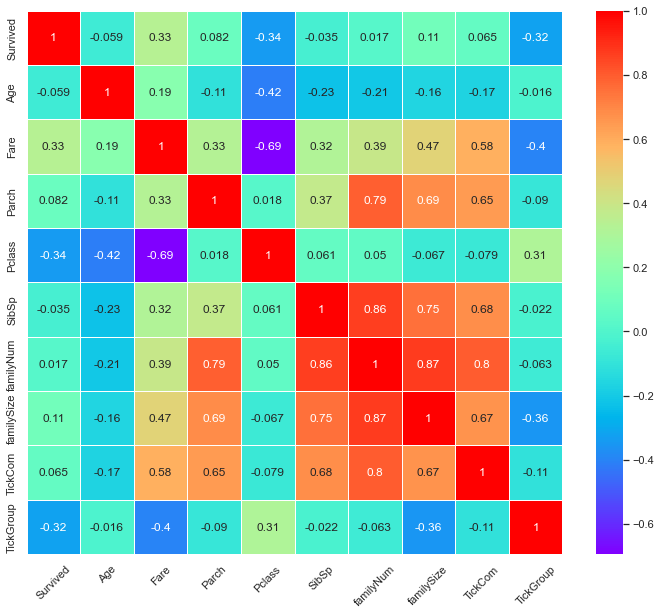

In [66]:
#热力图，查看Survived与其他特征间相关性大小
plt.figure(figsize=(12,10))
sns.heatmap(fullSel[['Survived','Age','Embarked','Fare','Parch','Pclass',
                    'Sex','SibSp','Title','familyNum','familySize','Deck',
                     'TickCom','TickGroup']].corr(),cmap='rainbow',annot=True,
           linewidths=.5)
_ = plt.xticks(rotation=45)

In [67]:
# 删除相关性系数低的属性
fullSel=fullSel.drop(['Age','Parch','SibSp','familyNum','TickCom'],axis=1)
#one-hot编码
fullSel=pd.get_dummies(fullSel)
fullSel.head()

,Survived,Pclass,Fare,familySize,TickGroup,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Title_Royalty,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,0.0,3,1.981001,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1.0,1,4.266662,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1.0,3,2.070022,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1.0,1,3.972177,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0.0,3,2.085672,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


# 算法建模

本项目比较了SCV/Decision Tree/Gradient Boosting/LDA/KNN/Logistic Regression等多种机器学习算
法的结果，并对表现较好的算法做进一步的对比，最终选择Gradient Boosting对乘客生存率进行预测

## 模型选择

In [68]:
#拆分实验数据与预测数据
experData=fullSel[fullSel['Survived'].notnull()] # 已有数据
preData=fullSel[fullSel['Survived'].isnull()] # 预测数据

experData_X=experData.drop('Survived',axis=1)
experData_y=experData['Survived']

preData_X=preData.drop('Survived',axis=1) # 空数据

#导入机器学习算法库
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold

#设置kfold，交叉采样法拆分数据集
kfold=StratifiedKFold(n_splits=10)

#汇总不同模型算法
classifiers=[]
classifiers.append(SVC())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(ExtraTreesClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression())
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(XGBClassifier())

In [69]:
#不同机器学习交叉验证结果汇总
cv_results=[]
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,experData_X,experData_y,
                                      scoring='accuracy',cv=kfold,n_jobs=-1))
    
#求出模型得分的均值和标准差
cv_means=[]
cv_std=[]
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
#汇总数据
cvResDf=pd.DataFrame({'cv_mean':cv_means,
                     'cv_std':cv_std,
                     'algorithm':['SVC','DecisionTreeCla','RandomForestCla','ExtraTreesCla',
                                  'GradientBoostingCla','KNN','LR','LDA','Xgboost']})

cvResDf

,cv_mean,cv_std,algorithm
0,0.835019,0.035179,SVC
1,0.810350,0.027989,DecisionTreeCla
2,0.818202,0.028628,RandomForestCla
3,0.814844,0.028753,ExtraTreesCla
4,0.829426,0.040034,GradientBoostingCla
5,0.823808,0.040767,KNN
6,0.830549,0.038304,LR
7,0.828327,0.039658,LDA
8,0.827203,0.036046,Xgboost


[(0.7, 0.9)]

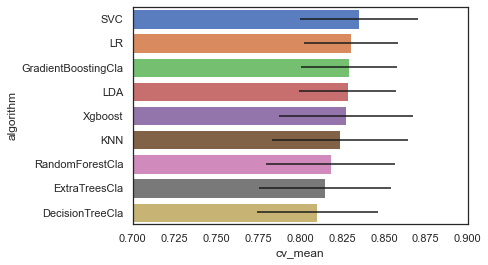

In [70]:
bar = sns.barplot(data=cvResDf.sort_values(by='cv_mean',ascending=False),
                  x='cv_mean',y='algorithm',**{'xerr':cv_std})
bar.set(xlim = (0.7,0.9))

## 模型调优

In [71]:
#GradientBoostingClassifier模型
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }
modelgsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, 
                                     scoring="accuracy", n_jobs= -1, verbose = 1)
modelgsGBC.fit(experData_X,experData_y)
modelgsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


0.8395380774032459

In [72]:

#LogisticRegression模型
modelLR=LogisticRegression()
LR_param_grid = {'C' : [1,2,3],
                'penalty':['l1','l2']}
modelgsLR = GridSearchCV(modelLR,param_grid = LR_param_grid, cv=kfold, 
                                     scoring="accuracy", n_jobs= -1, verbose = 1)
modelgsLR.fit(experData_X,experData_y)
modelgsLR.best_score_

Fitting 10 folds for each of 6 candidates, totalling 60 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_v

0.830561797752809

In [73]:
#SVC模型
svc = SVC()
gb_param_grid = {'C' : [0.1,0.5,1,2,3,5,10],
              'kernel':['rbf','poly','sigmoid']
              }
modelgsSVC = GridSearchCV(svc,param_grid = gb_param_grid, cv=kfold, 
                                     scoring="accuracy", n_jobs= -1, verbose = 1)
modelgsSVC.fit(experData_X,experData_y)
modelgsSVC.best_score_

Fitting 10 folds for each of 21 candidates, totalling 210 fits


0.8350187265917602

In [74]:
#LDA模型
lda = LinearDiscriminantAnalysis()
gb_param_grid = {'solver' : ['svd', 'lsqr', 'eigen'],
              'tol':[0.000001,0.00001,0.0001,0.001,0.01]
              }
modelgsLDA = GridSearchCV(lda,param_grid = gb_param_grid, cv=kfold, 
                                     scoring="accuracy", n_jobs= -1, verbose = 1)
modelgsLDA.fit(experData_X,experData_y)
modelgsLDA.best_score_

Fitting 10 folds for each of 15 candidates, totalling 150 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py", line 558, in fit
    self._solve_eigen(X, y,
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py", line 419, in _solve_eigen
    evals, evecs = linalg.eigh(Sb, Sw)
  File "/opt/anaconda3/lib/python3.9/site-packages/scipy/linalg/decomp.py", line 578, in eigh
    raise LinAlgError('The leading minor of order {} of B is not '
numpy.linalg.LinAlgError: The leading minor of order 6 of B is not positive definite. The factorization of B could not be completed and

0.8283270911360798

## 模型评估

<Figure size 432x288 with 0 Axes>

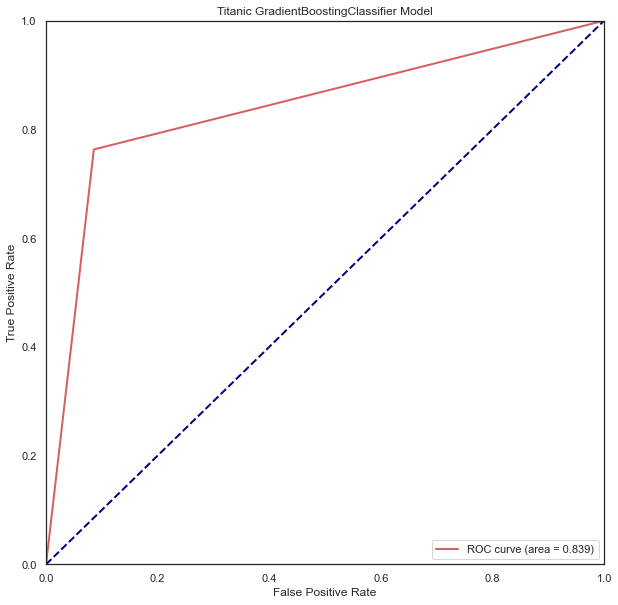

In [75]:
#查看模型ROC曲线
#求出测试数据模型的预测值
modelgsGBCtestpre_y=modelgsGBC.predict(experData_X).astype(int)

#画图
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(experData_y, modelgsGBCtestpre_y) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='r',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Titanic GradientBoostingClassifier Model')
plt.legend(loc="lower right")
plt.show()#查看模型ROC曲线
#求出测试数据模型的预测值
modelgsLRtestpre_y=modelgsLR.predict(experData_X).astype(int)
#画图
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(experData_y, modelgsLRtestpre_y) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='r',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Titanic LogisticRegression Model')
plt.legend(loc="lower right")
plt.show()

<Figure size 432x288 with 0 Axes>

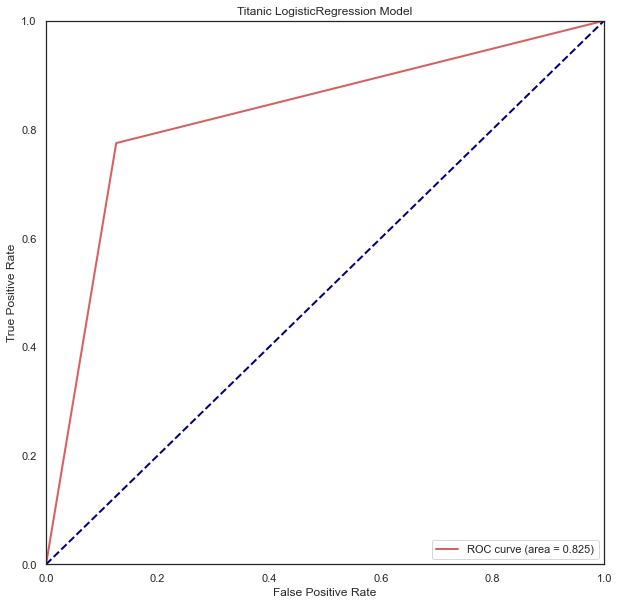

In [76]:
#查看模型ROC曲线
#求出测试数据模型的预测值
modelgsLRtestpre_y=modelgsLR.predict(experData_X).astype(int)
#画图
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(experData_y, modelgsLRtestpre_y) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='r',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Titanic LogisticRegression Model')
plt.legend(loc="lower right")
plt.show()

<Figure size 432x288 with 0 Axes>

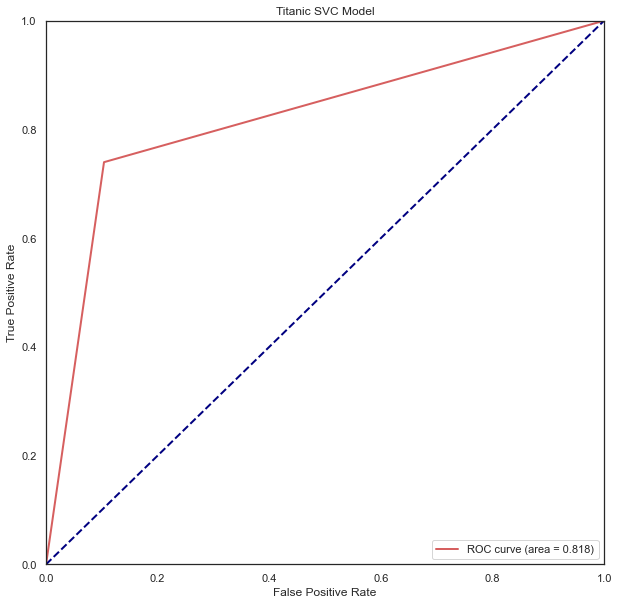

In [77]:
#查看模型ROC曲线
#求出测试数据模型的预测值
modelgsSVCtestpre_y=modelgsSVC.predict(experData_X).astype(int)
#画图
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(experData_y, modelgsSVCtestpre_y) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='r',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Titanic SVC Model')
plt.legend(loc="lower right")
plt.show()

## 混淆矩阵

In [78]:
#混淆矩阵
from sklearn.metrics import confusion_matrix
print('GradientBoostingClassifier模型混淆矩阵为\n',confusion_matrix(experData_y,modelgsGBCtestpre_y))
print('LogisticRegression模型混淆矩阵为\n',confusion_matrix(experData_y,modelgsLRtestpre_y))
print('SVC模型混淆矩阵为\n',confusion_matrix(experData_y,modelgsSVCtestpre_y))

GradientBoostingClassifier模型混淆矩阵为
 [[502  47]
 [ 81 261]]
LogisticRegression模型混淆矩阵为
 [[480  69]
 [ 77 265]]
SVC模型混淆矩阵为
 [[492  57]
 [ 89 253]]


In [79]:
#TitanicGBSmodle
y_ =modelgsGBC.predict(preData_X)
y_ = y_.astype(int)
#导出预测结果
GBCpreResultDf=pd.DataFrame()
GBCpreResultDf['PassengerId']=full['PassengerId'][full['Survived'].isnull()]
GBCpreResultDf['Survived']= y_
GBCpreResultDf
#将预测结果导出为csv文件
GBCpreResultDf.to_csv('./lufengkun_titanic.csv',index=False)
display(GBCpreResultDf.head())

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1


In [80]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
